In [43]:
import numpy as np
import sys
np.set_printoptions(precision=10, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', True)

In [52]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "6-311G**", ### Split-Valence Basis Set, six Gaussian functions for the core and valence electrons of each atom.
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)
e, wfn = psi4.energy("scf", return_wfn=True)


In [54]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

cavity_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'cas',
    'nact_orbs' : 8, 
    'nact_els' : 4,
    'full_diagonalization' : True,
    'number_of_photons' : 1
}

mol = psi4.geometry(mol_str)

psi4.set_options(options_dict)

test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)

# test to make sure the CASCI energies match the expected values
expected = np.array([-7.9848177366, -7.8640432702, -7.8443027321, -7.8351500625, -7.7967681454,
            -7.7967681454, -7.790848489,  -7.790848489,  -7.7563223937, -7.7437841386])

#assert np.allclose(test_pf.CIeigs[:10], expected)


Start SCF iterations:

Canonical RHF One-electron energy = -12.5925193790543304
CQED-RHF One-electron energy      = -12.5918498866481059
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0006804157725302
SCF Iteration   1: Energy = -7.9840375285780469   dE = -7.98404E+00   dRMS = 7.58437E-06
SCF Iteration   2: Energy = -7.9840376228143404   dE = -9.42363E-08   dRMS = 2.66874E-06
SCF Iteration   3: Energy = -7.9840376396926542   dE = -1.68783E-08   dRMS = 7.93097E-07
SCF Iteration   4: Energy = -7.9840376413537752   dE = -1.66112E-09   dRMS = 1.41283E-07
SCF Iteration   5: Energy = -7.9840376413837442   dE = -2.99689E-11   dRMS = 2.29939E-08
SCF Iteration   6: Energy = -7.9840376413847407   dE = -9.96536E-13   dRMS = 1.12146E-09
SCF Iteration   7: Energy = -7.9840376413847371   dE =  3.55271E-15   dRMS = 9.73520E-11
Total time for SCF iterations: 0.010 seconds 

QED-RHF   energy: -7.98403764 hartree
Psi4  SCF energy: -7.98420580 hartree
 Compl

In [48]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50     ## Bondlength
N_el = 50
all_states = np.linspace(0, N_el-1, N_el, dtype=int)       ## linespace generates evenly spaced numbers within a specified interval.
r_array = np.linspace(1.4, 2.2, N_R)

E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))      #######?? Dimensions
psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)  #### this line performs a self-consistent field (SCF) calculation using Psi4 and returns the SCF energy and the wavefunction object. 
    #fci_energy = psi4.energy('fci',ref_wfn=wfn)    ### FCI calculation is generally feasible only for small systems due to the exponential scaling of the calculation with the number of electrons and basis functions.
                                                    ### Basis set is large. 
    LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
    #assert np.isclose(fci_energy, LiH.CIeigs[0], 1e-7)
    #sort out states with dipole-allowed transition from ground state
    singlet_states = LiH.sort_dipole_allowed_states( N_el)
    print(singlet_states)
    
    E_array[r_idx, :] = LiH.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = LiH.compute_dipole_moments(singlet_states)
    
    # uncomment to try not sorting singlet states
    #E_array[r_idx, :] = LiH.CIeigs[all_states]
    #Mu_array[r_idx, :, :, :] = LiH.compute_dipole_moments(all_states)
    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.7385117713869356
CQED-RHF One-electron energy      = -12.7379011492056993
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0006176904138339
SCF Iteration   1: Energy = -7.9789411412836326   dE = -7.97894E+00   dRMS = 7.11725E-06
SCF Iteration   2: Energy = -7.9789412209360666   dE = -7.96524E-08   dRMS = 2.45118E-06
SCF Iteration   3: Energy = -7.9789412345063084   dE = -1.35702E-08   dRMS = 7.24961E-07
SCF Iteration   4: Energy = -7.9789412358629690   dE = -1.35666E-09   dRMS = 1.37621E-07
SCF Iteration   5: Energy = -7.9789412358920604   dE = -2.90914E-11   dRMS = 2.24720E-08
SCF Iteration   6: Energy = -7.9789412358930072   dE = -9.46798E-13   dRMS = 1.11243E-09
SCF Iteration   7: Energy = -7.9789412358930072   dE =  0.00000E+00   dRMS = 9.92675E-11
Total time for SCF iterations: 0.011 seconds 

QED-RHF   energy: -7.97894124 hartree
Psi4  SCF energy: -

 Completed constant offset matrix in 0.0007727146148681641 seconds
 Completed Hamiltonian build in 2.1953141689300537 seconds
[0, 1, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 28, 34, 35, 37, 38, 42, 43, 44, 47, 49, 50, 51, 53, 58, 59, 60, 62, 63, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 86, 87, 89, 93, 97, 98]

Li
H 1 1.4816326530612245
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6184915955316725
CQED-RHF One-electron energy      = -12.6178332721168260
Nuclear repulsion energy          = 1.0714745174723141
Dipole energy                     = 0.0006685019814002
SCF Iteration   1: Energy = -7.9834012167822515   dE = -7.98340E+00   dRMS = 7.49759E-06
SCF Iteration   2: Energy = -7.9834013081501407   dE = -9.13679E-08   dRMS = 2.62781E-06
SCF Iteration   3: Energy = -7.9834013243675024   dE = -1.62174E-08   dRMS = 7.80106E-07
SCF Iteration   4: Energy = -7.9834013259674776   dE = -1.59998E-09   dRMS = 1.40608E-07
SCF Iteration   5: Energy = -7.9834

Generating all determinants in active space
 Completed determinant list in 0.003503084182739258 seconds 
 Completed constant offset matrix in 0.00044274330139160156 seconds
 Completed Hamiltonian build in 2.2830331325531006 seconds
[0, 1, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 28, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 51, 55, 58, 59, 60, 62, 63, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 87, 88, 89, 95, 99, 100]

Li
H 1 1.5632653061224488
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5058307240581712
CQED-RHF One-electron energy      = -12.5051215230431190
Nuclear repulsion energy          = 1.0155228455416452
Dipole energy                     = 0.0007228262003303
SCF Iteration   1: Energy = -7.9853688110557828   dE = -7.98537E+00   dRMS = 7.88793E-06
SCF Iteration   2: Energy = -7.9853689159071317   dE = -1.04851E-07   dRMS = 2.81355E-06
SCF Iteration   3: Energy = -7.9853689352696273   dE = -1.93625E-08   dRMS = 8.39632E-07
SCF Iteration   4

 Completed determinant list in 0.003654003143310547 seconds 
 Completed constant offset matrix in 0.0006520748138427734 seconds
 Completed Hamiltonian build in 2.172122001647949 seconds
[0, 1, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 28, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 51, 55, 58, 59, 60, 62, 63, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 85, 88, 89, 97, 98, 102]

Li
H 1 1.6448979591836734
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.4000222937644846
CQED-RHF One-electron energy      = -12.3992589988657933
Nuclear repulsion energy          = 0.9651246894353599
Dipole energy                     = 0.0007807405944476
SCF Iteration   1: Energy = -7.9854396757519090   dE = -7.98544E+00   dRMS = 8.29267E-06
SCF Iteration   2: Energy = -7.9854397961842327   dE = -1.20432E-07   dRMS = 3.01043E-06
SCF Iteration   3: Energy = -7.9854398192867322   dE = -2.31025E-08   dRMS = 9.04079E-07
SCF Iteration   4: Energy = -7.9854398215308429   dE = -2.24411

Generating all determinants in active space
 Completed determinant list in 0.003511190414428711 seconds 
 Completed constant offset matrix in 0.0006940364837646484 seconds
 Completed Hamiltonian build in 2.188861846923828 seconds
[0, 2, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 28, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 52, 57, 58, 59, 60, 62, 63, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 85, 90, 91, 96, 97, 102]

Li
H 1 1.726530612244898
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3005781116349233
CQED-RHF One-electron energy      = -12.2997574751011349
Nuclear repulsion energy          = 0.9194923164124112
Dipole energy                     = 0.0008423107098191
SCF Iteration   1: Energy = -7.9840727592467804   dE = -7.98407E+00   dRMS = 8.71533E-06
SCF Iteration   2: Energy = -7.9840728977215765   dE = -1.38475E-07   dRMS = 3.22030E-06
SCF Iteration   3: Energy = -7.9840729252664904   dE = -2.75449E-08   dRMS = 9.73978E-07
SCF Iteration   4: E

 Completed constant offset matrix in 0.0007429122924804688 seconds
 Completed Hamiltonian build in 2.1652820110321045 seconds
[0, 2, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 29, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 52, 57, 58, 59, 60, 62, 63, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 85, 92, 93, 97, 98, 101]

Li
H 1 1.8081632653061224
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2070423445055809
CQED-RHF One-electron energy      = -12.2061610953963076
Nuclear repulsion energy          = 0.8779802479513544
Dipole energy                     = 0.0009075882003671
SCF Iteration   1: Energy = -7.9816226234597458   dE = -7.98162E+00   dRMS = 9.15869E-06
SCF Iteration   2: Energy = -7.9816227828445605   dE = -1.59385E-07   dRMS = 3.44482E-06
SCF Iteration   3: Energy = -7.9816228156533917   dE = -3.28088E-08   dRMS = 1.04991E-06
SCF Iteration   4: Energy = -7.9816228188341078   dE = -3.18072E-09   dRMS = 1.54714E-07
SCF Iteration   5: Energy = -7.981

 Completed determinant list in 0.0037071704864501953 seconds 
 Completed constant offset matrix in 0.0008111000061035156 seconds
 Completed Hamiltonian build in 2.1813459396362305 seconds
[0, 2, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 29, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 52, 57, 58, 59, 60, 62, 65, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 85, 92, 93, 97, 98, 101]

Li
H 1 1.889795918367347
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1189939947204195
CQED-RHF One-electron energy      = -12.1180488452700530
Nuclear repulsion energy          = 0.8400545352968682
Dipole energy                     = 0.0009766113463749
SCF Iteration   1: Energy = -7.9783638436110458   dE = -7.97836E+00   dRMS = 9.62512E-06
SCF Iteration   2: Energy = -7.9783640272332779   dE = -1.83622E-07   dRMS = 3.68544E-06
SCF Iteration   3: Energy = -7.9783640662593527   dE = -3.90261E-08   dRMS = 1.13257E-06
SCF Iteration   4: Energy = -7.9783640700612892   dE = -3.8019

Generating all determinants in active space
 Completed determinant list in 0.0035059452056884766 seconds 
 Completed constant offset matrix in 0.0005629062652587891 seconds
 Completed Hamiltonian build in 2.191620111465454 seconds
[0, 2, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 29, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 52, 57, 58, 59, 60, 62, 65, 67, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 87, 92, 93, 97, 98, 102]

Li
H 1 1.9714285714285715
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0360452726277423
CQED-RHF One-electron energy      = -12.0350329232721744
Nuclear repulsion energy          = 0.8052696684108697
Dipole energy                     = 0.0010494052414521
SCF Iteration   1: Energy = -7.9745095543325997   dE = -7.97451E+00   dRMS = 1.01168E-05
SCF Iteration   2: Energy = -7.9745097660438740   dE = -2.11711E-07   dRMS = 3.94346E-06
SCF Iteration   3: Energy = -7.9745098123854730   dE = -4.63416E-08   dRMS = 1.22279E-06
SCF Iteration   4:

 Completed determinant list in 0.003662109375 seconds 
 Completed constant offset matrix in 0.0008099079132080078 seconds
 Completed Hamiltonian build in 2.1878409385681152 seconds
[0, 2, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 29, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 52, 57, 58, 59, 60, 62, 65, 66, 68, 69, 70, 71, 73, 75, 78, 79, 81, 83, 89, 93, 94, 97, 98, 102]

Li
H 1 2.053061224489796
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9578391618455235
CQED-RHF One-electron energy      = -11.9567563059515969
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0011259810950799
SCF Iteration   1: Energy = -7.9702255973559790   dE = -7.97023E+00   dRMS = 1.06361E-05
SCF Iteration   2: Energy = -7.9702258416072898   dE = -2.44251E-07   dRMS = 4.22011E-06
SCF Iteration   3: Energy = -7.9702258965210788   dE = -5.49138E-08   dRMS = 1.32158E-06
SCF Iteration   4: Energy = -7.9702259020048807   dE = -5.48380E-09  

 Completed determinant list in 0.003718852996826172 seconds 
 Completed constant offset matrix in 0.001863241195678711 seconds
 Completed Hamiltonian build in 2.179738759994507 seconds
[0, 2, 3, 6, 7, 9, 11, 13, 16, 17, 19, 21, 22, 26, 27, 29, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 54, 57, 58, 59, 60, 62, 63, 66, 68, 69, 70, 71, 73, 75, 78, 79, 81, 85, 89, 93, 94, 95, 96, 103]

Li
H 1 2.1346938775510207
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.8840471817533846
CQED-RHF One-electron energy      = -11.8828905108212428
Nuclear repulsion energy          = 0.7436811660467495
Dipole energy                     = 0.0012063350019188
SCF Iteration   1: Energy = -7.9656412985429599   dE = -7.96564E+00   dRMS = 1.11851E-05
SCF Iteration   2: Energy = -7.9656415804689962   dE = -2.81926E-07   dRMS = 4.51654E-06
SCF Iteration   3: Energy = -7.9656416453828589   dE = -6.49139E-08   dRMS = 1.43008E-06
SCF Iteration   4: Energy = -7.9656416520047246   dE = -6.62187E

 Completed determinant list in 0.003664731979370117 seconds 
 Completed constant offset matrix in 0.0008299350738525391 seconds
 Completed Hamiltonian build in 2.1948490142822266 seconds
[0, 2, 3, 6, 7, 9, 12, 13, 16, 17, 19, 21, 22, 26, 27, 29, 34, 35, 36, 37, 42, 45, 46, 47, 49, 50, 54, 57, 58, 59, 60, 62, 63, 66, 68, 69, 70, 71, 73, 75, 79, 80, 81, 87, 91, 92, 93, 95, 96, 103]


In [49]:
from matplotlib import pyplot as plt

[1.4          1.4163265306 1.4326530612 1.4489795918 1.4653061224 1.4816326531 1.4979591837 1.5142857143 1.5306122449 1.5469387755 1.5632653061 1.5795918367 1.5959183673 1.612244898  1.6285714286
 1.6448979592 1.6612244898 1.6775510204 1.693877551  1.7102040816 1.7265306122 1.7428571429 1.7591836735 1.7755102041 1.7918367347 1.8081632653 1.8244897959 1.8408163265 1.8571428571 1.8734693878
 1.8897959184 1.906122449  1.9224489796 1.9387755102 1.9551020408 1.9714285714 1.987755102  2.0040816327 2.0204081633 2.0367346939 2.0530612245 2.0693877551 2.0857142857 2.1020408163 2.1183673469
 2.1346938776 2.1510204082 2.1673469388 2.1836734694 2.2         ]
[0.1207242341 0.120716781  0.1207085911 0.120699574  0.1206896242 0.1206786179 0.1206664086 0.1206528223 0.1206376507 0.1206206426 0.1206014924 0.1205798255 0.1205551783 0.1205269707 0.1204944697
 0.1204567381 0.1204125628 0.1203603538 0.1202980005 0.1202226673 0.1201305059 0.1200162625 0.1198727783 0.1196904612 0.1194569917 0.1191578563 0.118

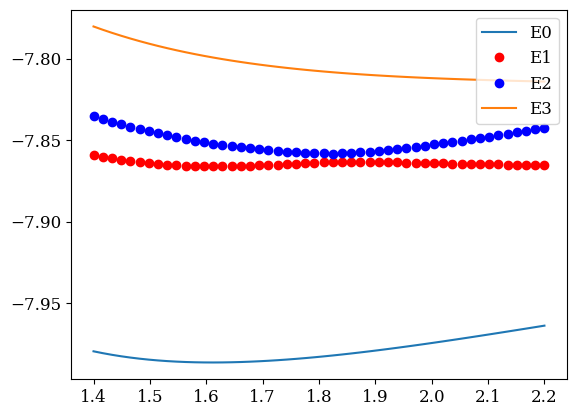

In [51]:
print(r_array)
print(E_array[:,1]-E_array[:,0])

#plt.plot(r_array, E_array[:,1]-E_array[:,0])
#plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, E_array[:,0], label="E0")
plt.plot(r_array, E_array[:,1], 'ro', label="E1")
plt.plot(r_array, E_array[:,2], 'bo', label="E2")
plt.plot(r_array, E_array[:,4], label="E3")
plt.legend()
# plt.xlim(1.79, 1.81)
plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [7]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF
                
            
    
        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [8]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.12086
lambda_vector = np.array([0., 0., 0.08])      ##### This is the value you have to change and try..........
N_el = 3
N_ph = 2
pcqed_nel3_np2 = np.zeros((N_R, N_el * N_ph ))
_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print(_HPF)

[[-7.963184 -0.000113  0.001249  0.        0.000631 -0.011684]
 [-0.000113 -7.843431 -0.00068   0.000631  0.        0.005802]
 [ 0.001249 -0.00068  -7.797483 -0.011684  0.005802  0.      ]
 [ 0.        0.000631 -0.011684 -7.842324 -0.000113  0.001249]
 [ 0.000631  0.        0.005802 -0.000113 -7.722571 -0.00068 ]
 [-0.011684  0.005802  0.        0.001249 -0.00068  -7.676623]]


We want to investigate the mean absolute error of a given polariton potential energy surface as a 
function of electronic and photonic truncation:

$$ {\rm MAE} = \frac{1}{N_R} \sum_i^{N_R} \left| E(R_i) - E^{'}(R_i) \right| $$

where $E^{'}(R_i)$ is a value of the polaritonic PES for a truncated level of theory and $E(R_i)$ is the exact value.

In [9]:
def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR

    

In [10]:
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
from matplotlib import pyplot as plt

In [11]:
# Adding more cells for different states
# three energy and one Mu array 
# one for no cavity and see syntax from previous notebook 
# also, the graphs check on shorting the eigen values if you see any abnormalities in graphs.

In [12]:
N_el = 30
N_ph = 20
pcqed_nel30_np20 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)   
    pcqed_nel30_np20[k,:] = pf_e

In [13]:
N_el = 10
N_ph = 2
pcqed_nel10_np2 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)    
    pcqed_nel10_np2[k,:] = pf_e

In [14]:
N_el = 50
N_ph = 7
pcqed_nel50_np7 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)    
    pcqed_nel50_np7[k,:] = pf_e

In [15]:
# N_el = 50
# N_ph = 50
# pcqed_nel50_np50 = np.zeros((N_R, N_el * N_ph ))
# for k in range(N_R):           
#     _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
#     pf_e, pf_c = np.linalg.eigh(_HPF)    
#     pcqed_nel50_np50[k,:] = pf_e

In [16]:
N_el = 5
N_ph = 5
pcqed_nel5_np5 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)    
    pcqed_nel5_np5[k,:] = pf_e

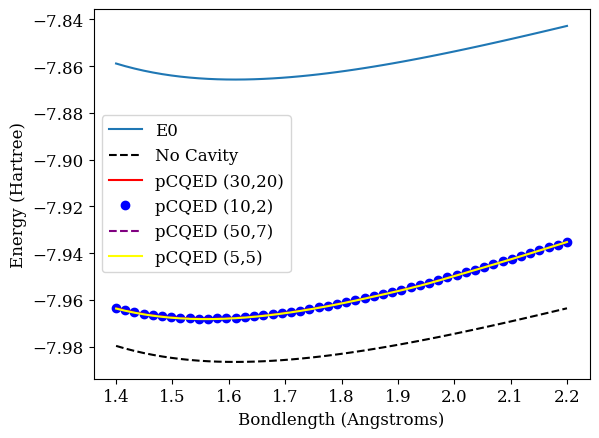

In [24]:
plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, E_array[:,0], 'black', linestyle="dashed", label="No Cavity")
plt.plot(r_array, pcqed_nel30_np20[:,0], 'red', label="pCQED (30,20)")
plt.plot(r_array, pcqed_nel10_np2[:,0], 'bo', label="pCQED (10,2)")
plt.plot(r_array, pcqed_nel50_np7[:,0], 'purple', linestyle="dashed", label="pCQED (50,7)")
# plt.plot(r_array, pcqed_nel50_np50[:,0], 'yo', label="pCQED (50,50)")
plt.plot(r_array, pcqed_nel5_np5[:,0], 'yellow',label="pCQED (5,5)")
# plt.xlim(1.4, 2.0)
# plt.ylim(-7.885, -7.855)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

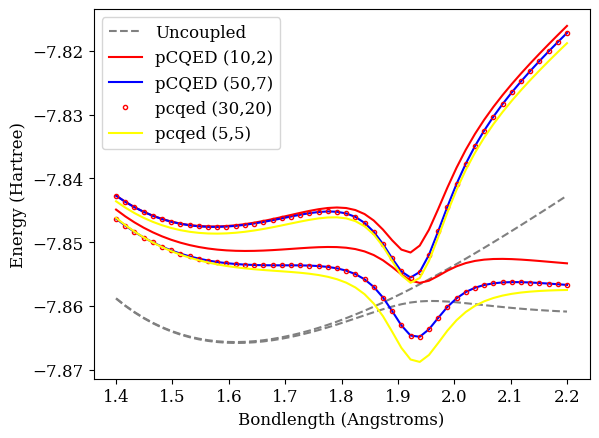

In [29]:
plt.plot(r_array, E_array[:,0]+0.12086, 'grey', linestyle="dashed", label="Uncoupled")
plt.plot(r_array, E_array[:,1], 'grey', linestyle="dashed")#, label="Ee Uncoupled")
plt.plot(r_array, pcqed_nel10_np2[:,1], 'red', label="pCQED (10,2)")
plt.plot(r_array, pcqed_nel10_np2[:,2], 'red')# label="pCQED (10,2)")
plt.plot(r_array, pcqed_nel50_np7[:,1], 'blue',  label="pCQED (50,7)")
plt.plot(r_array, pcqed_nel50_np7[:,2], 'blue')#,  label="pCQED (50,7)")
plt.plot(r_array, pcqed_nel30_np20[:,1], 'ro', ms = 3, mfc = 'none', label="pcqed (30,20)")
plt.plot(r_array, pcqed_nel30_np20[:,2], 'ro', ms = 3, mfc = 'none')
# plt.plot(r_array, pcqed_nel50_np50[:,1], 'yo', ms = 3, mfc = 'none', label="pcqed (50,50)")
# plt.plot(r_array, pcqed_nel50_np50[:,2], 'yo', ms = 3, mfc = 'none')
plt.plot(r_array, pcqed_nel5_np5[:,1], 'yellow', ms = 3, mfc = 'none', label="pcqed (5,5)")
plt.plot(r_array, pcqed_nel5_np5[:,2], 'yellow', ms = 3, mfc = 'none')
# plt.xlim(1.4, 2.0)
# plt.ylim(-7.765, -7.725)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.savefig("sto3g_lih_lp_up_lambda_05.png")
plt.show()

In [55]:
## How to add scqed states for comparsion?
## Analysis from different graphs
## What is (;,0) and (;,1), (;,2).
## 

In [ ]:
## pick different omega values ?
## 